# Introduccion

La iteración de política (Policy Iteration en inglés) es un algoritmo utilizado en el aprendizaje por refuerzo, específicamente en el contexto del Aprendizaje de Refuerzo basado en Valor (Value-Based Reinforcement Learning). Se utiliza para encontrar la política óptima en un entorno de toma de decisiones.

A continuación se expondrá el código de implementación del algoritmo y su aplicación para el problema GridWorld. Este marco de trabajo se divide en 4 etapas: Lectura (LecturaDeDatos), implementación del algoritmo (Algoritmo_Iteracion_Politica), visualización de los datos (VisualizacionDatos) y la experimentación con datos con estados objetivos fijos (FixedGoalInitialState) y aleatorios (RandomGoalInitialState).

## Lectura de datos:

Los datos fueron alojados en el repositorio https://github.com/djsg2021utec/proyecto-1-incertidumbre. Esta etapa tiene las siguientes tareas:

1. Importar el archivo de github y convertirla en una lista de strings (url → fileContent).
2. Modificar la lista quitándole espacios vacíos y saltos de línea (fileContent →  Gridworld_NotSpaces)

### Implementación de funciones

In [122]:
# Se quitan los elementos innecesarios del archivo y se crea una lista con strings con las mismas dimensiones y sin espacios (GridWorld_NotSpaces)
import requests
  
# Implementación de la función LecturaDeDatos.
def LecturaDeDatos(url):
  # 1. Importar el archivo de github y convertirla en una lista de strings (url → fileContent).
  response = requests.get(url)
  fileContent = response.text
  # 2. Modificar la lista quitándole espacios vacíos y saltos de línea (fileContent →  Gridworld_NotSpaces)
  fileContentSplitted = fileContent.split("\n")
  Gridworld=fileContentSplitted[2:-1]
  def RemoveSpace(StringWorld):
      StringWorld=StringWorld.replace(" ","")
      return StringWorld

  result = map(RemoveSpace,Gridworld)
  Gridworld_NotSpaces = list(result)

  return Gridworld_NotSpaces


### Ejecución 

In [123]:
# FIXED INITIAL STATE

# url = "https://raw.githubusercontent.com/djsg2021utec/proyecto-1-incertidumbre/main/PoliticasFixedRandom/FixedGoalInitialState/navigation_1.net_grid.txt"

# RANDOM INITIAL STATE

# url="https://raw.githubusercontent.com/djsg2021utec/proyecto-1-incertidumbre/main/PoliticasFixedRandom/RandomGoalInitialState/navigation_1.net_grid.txt"

# Tipos de Grid
#  4x4: prueba4x4.net_grid.txt (Prueba)
#  20x20: navigation_1.net_grid.txt
#  40x40: navigation_2.net_grid.txt
#  60x60: navigation_3.net_grid.txt
#  80x80: navigation_4.net_grid.txt
#  100x100: navigation_5.net_grid.txt
#  120x120: navigation_6.net_grid.txt
#  140x140: navigation_7.net_grid.txt
#  160x160: navigation_8.net_grid.txt
#  180x180: navigation_9.net_grid.txt
url="https://raw.githubusercontent.com/djsg2021utec/proyecto-1-incertidumbre/main/PoliticasFixedRandom/RandomGoalInitialState/navigation_1.net_grid.txt"
Gridworld_NotSpaces = LecturaDeDatos(url)
for rows in Gridworld_NotSpaces:
  print(rows)

↓↓↓←←←←←□↓↓□↓↓↓↓□↓↓□
↓←←↓□↓▼↑←←←←←←←←←←←←
↓↓□→→→↓←↓↓↓↓□↑↑↑↑↑↑↑
→→→↑↑□↓□→→→→↓↓↓□↓→→↑
↓↓↓↓↓→→→↑↑↑□→→→→↓↓↑↑
↓←←←←□↓↓↓↓↓↓↑↑↑□→↓↓↑
↓↓□↑↑←←←←←←←□↓↓↓↓→↓←
→→↓↓↓↓↓↓↑↑↑↑←←←←←□↓□
↑□→→→→→↓←→→↑↑□↑↑↑←←←
↓↓↓↑↑↑□↓↓↓↓↑↓↓↓→↑↑↑↑
G←←□↓↓↓→→→↓□→→↓□↓□↓↓
↑↑↑←←←←□↓↓→→↑□→→→→→↓
↓←□↑□↑↑←←←□↓↓↓↓↓□↓↓↓
↓↓↓↓↓↓□↑↑↑←←←←←←←←←←
→→→→→→→↓↓↑↑↑↑↑↑↑↑↑↑↑
↓↓↓□↓□↓↓←←←↓↓↓↓↓□→→↑
↓←←←←←←←↓↓□→→→→→→↑□↑
↓↓↑↑↓↓↓□→→→↑↑↑↑↑↑↑↓↓
→↓↓□→→→→↑↑↑↑←←←←←←←←
□→→→↑↑↑↑↑←←□↑↑↑↑↑↑↑↑


## Implementación del algoritmo:

Esta etapa tiene las siguientes tareas:

1. Definir las acciones válidas, los estados iniciales, estado final y el diccionario de movimientos.
2. Implementar las funciones complementarias al algoritmo
3. Implementación de la función del algoritmo de Iteración de Política que genere el espacio de estados optimizados **(GridWorldOptimizado)**, el diccionario con la información de los estados **(dict_estados)**, la lista que guarda la media de la variación entre políticas en cada iteración **(deltas)**, el número de iteraciones **(numero_iteraciones)** y el tiempo transcurrido para ejecutar todo el algoritmo **(tiempo_transcurrido)**.

### Definicion

In [124]:
# Se definen las acciones validas, estados iniciales, estado final y un diccionario de movimientos
acciones_validas = ['→','←','↑','↓','□']
estados_iniciales = [ '▶','◀','▲','▼'] # ▲
estado_final = 'G'
diccionario_movimientos = {'→': [0, 1], '←':[0, -1], '↑': [-1, 0], '↓':[1, 0],
                           '▶': [0, 1], '◀':[0, -1],'▲':[-1, 0], '▼': [1, 0],
                           '>':[0, 1], '<': [0, -1], '^':[-1, 0], '˅': [1, 0]}


### Implementacion

In [125]:
# Se importan librerías para una manejo más fácil
import numpy as np
import time

# Funciones para definir parámetros geométricos en el Grid
def horizontal_line(begin, end, y):
    return [(i, y) for i in range(begin, end, (1 if end > begin else -1))]

def vertical_line(begin, end, x):
    return [(x, i) for i in range(begin, end, (1 if end > begin else -1))]

def layer(center, level):
    center_x, center_y = center
    right_bottom = vertical_line(center_y, center_y + level, center_x + level)
    bottom_line = horizontal_line(center_x + level, center_x - level, center_y + level)
    left_line = vertical_line(center_y + level, center_y - level, center_x - level)
    top_line = horizontal_line(center_x - level, center_x + level, center_y - level)
    right_top = vertical_line(center_y-level, center_y, center_x + level)

    return right_bottom + bottom_line + left_line + top_line + right_top

def layers(center, number_levels):
    return [layer(center, level) for level in range(1, number_levels)]

def all_layers(center, number_levels):
    return [cell for single_layer in layers(center, number_levels) for cell in single_layer]

# Función para validar una coordenada
def validar_coordenada(coordenada_in):
    if coordenada_in[0] >=0 and coordenada_in[1] < len(Gridworld_NotSpaces):
        if coordenada_in[1] >= 0 and coordenada_in[0] < len(Gridworld_NotSpaces):
            if Gridworld_NotSpaces[coordenada_in[0]][coordenada_in[1]] != "□":
                return True
    
    return False

# Función para obtener coordenadas validas vecinas para un estado
def getCoordenadasValidas(coordendas_in):
    coordenadas_vecinas = []
    coord_up = [coordendas_in[0] - 1, coordendas_in[1]]
    coord_down = [coordendas_in[0] + 1, coordendas_in[1]]
    coord_right = [coordendas_in[0], coordendas_in[1] + 1]
    coord_left = [coordendas_in[0], coordendas_in[1] - 1]
    
    # arriba
    if validar_coordenada(coord_up):
        if Gridworld_NotSpaces[coord_up[0]][coord_up[1]] != "□":
            coordenadas_vecinas.append(coord_up)

    # abajo
    if validar_coordenada(coord_down):
        if Gridworld_NotSpaces[coord_down[0]][coord_down[1]] != "□":
            coordenadas_vecinas.append(coord_down)

    # derecha
    if validar_coordenada(coord_right):
        if Gridworld_NotSpaces[coord_right[0]][coord_right[1]] != "□":
            coordenadas_vecinas.append(coord_right)

    # izquierda   
    if validar_coordenada(coord_left):
        if Gridworld_NotSpaces[coord_left[0]][coord_left[1]] != "□":
            coordenadas_vecinas.append(coord_right)

    return coordenadas_vecinas

# Función para obtener el valor inicial para cada estado
def getAccionInicial(coordenadas_in):
    if Gridworld_NotSpaces[coordenadas_in[0]][coordenadas_in[1]] != "□":
        return Gridworld_NotSpaces[coordenadas_in[0]][coordenadas_in[1]]
    return Gridworld_NotSpaces[coordenadas_in[0]][coordenadas_in[1]]

# Función para obtener las coordenadas del estado inicial en el GridWorld
def getCoordInicial(Gridworld_NotSpaces):
  for i in range(len(Gridworld_NotSpaces)):
    for j in range(len(Gridworld_NotSpaces)):
      if list(Gridworld_NotSpaces[i])[j] in estados_iniciales:
        coord_inicial = (i,j)
  return coord_inicial

# Función para obtener las coordenadas del estado meta o final en el GridWorld
def getCoordFinal(Gridworld_NotSpaces):
  for i in range(len(Gridworld_NotSpaces)):
    for j in range(len(Gridworld_NotSpaces)):
      if list(Gridworld_NotSpaces[i])[j] == 'G':
        coord_final = (i,j)
  return coord_final

# Función para obtener coordenadas validas vecinas para un estado
def getMovimientosValidos(coordendas_in):
    movimientos_validos = []
    coord_up = [coordendas_in[0] - 1, coordendas_in[1]]
    coord_down = [coordendas_in[0] + 1, coordendas_in[1]]
    coord_right = [coordendas_in[0], coordendas_in[1] + 1]
    coord_left = [coordendas_in[0], coordendas_in[1] - 1]
    
    # arriba
    if validar_coordenada(coord_up):
        if Gridworld_NotSpaces[coord_up[0]][coord_up[1]] != "□":
            movimientos_validos.append(Gridworld_NotSpaces[coord_up[0]][coord_up[1]])

    # abajo
    if validar_coordenada(coord_down):
        if Gridworld_NotSpaces[coord_down[0]][coord_down[1]] != "□":
            movimientos_validos.append(Gridworld_NotSpaces[coord_down[0]][coord_down[1]])

    # derecha
    if validar_coordenada(coord_right):
        if Gridworld_NotSpaces[coord_right[0]][coord_right[1]] != "□":
            movimientos_validos.append(Gridworld_NotSpaces[coord_right[0]][coord_right[1]])

    # izquierda   
    if validar_coordenada(coord_left):
        if Gridworld_NotSpaces[coord_left[0]][coord_left[1]] != "□":
            movimientos_validos.append(Gridworld_NotSpaces[coord_left[0]][coord_left[1]])

    return movimientos_validos

# Función para construir el diccionario para todos los estados del GridWorld
def construir_diccionario(Gridworld_NotSpaces):
  dict_estados = {}
  index_row = 0
  for i in range(len(Gridworld_NotSpaces)):
      index_column = 0
      for j in range(len(Gridworld_NotSpaces)):
          valor_nodo = float("inf")
          dict_key = str(index_row) +"-" +str(index_column)
          coordenadas = [index_row, index_column]
          if Gridworld_NotSpaces[index_row][index_column] == "G":
              #dict_key = "EstadoFinal" 
              valor_nodo = 0
          dict_estados[dict_key] = [coordenadas, getAccionInicial(coordenadas), getMovimientosValidos(coordenadas), 
                                      valor_nodo, getCoordenadasValidas(coordenadas)]
          index_column += 1
      index_row += 1
  return dict_estados

# Función para calcular el número promedio de variaciones de un estado a otro
def getDeltaPolitica(politica_actual, politica_nueva):
  Delta = 0
  if len(politica_actual) == len(politica_nueva):
    n= len(politica_actual)
    for i in range(n):
      if politica_actual[i] == float('inf') or politica_nueva[i] == float('inf'):
        continue
      else:
        Delta += abs(politica_actual[i]-politica_nueva[i])
  Delta=Delta/n
  return Delta

### Algoritmo de Iteración de Políticas

In [126]:
def Algoritmo_Iteracion_Politica(Gridworld_NotSpaces):
  # Se inicializa un diccionario que guardará la información de todos los estados
  # string_coordenadas: [valor_id_0, valor_id_1, valor_id_2, valor_id_3, valor_id_4]
  # clave: string_coordenadas
  # valor: lista de valores que guardan la información del estado
  #   valor_id_0: list_coordenadas
  #   valor_id_1: chr_accion
  #   valor_id_2: list_acciones_permitidas
  #   valor_id_3: float_valor
  #   valor_id_4: lista_acciones_permitidas_en_coordenadas

  # Se construye el diccionario
  dict_estados = construir_diccionario(Gridworld_NotSpaces)

  ## Se definen los siguientes parámetros:

  costo_accion = 1 # Costo de cada accion

  valor_final = 0 # Valor del estado final

  coordenadas_iniciales = dict_estados[str(getCoordInicial(Gridworld_NotSpaces)[0])+"-"+str(getCoordInicial(Gridworld_NotSpaces)[1])][0] #Coordenadas Iniciales

  coordenadas_finales = dict_estados[str(getCoordFinal(Gridworld_NotSpaces)[0])+"-"+str(getCoordFinal(Gridworld_NotSpaces)[1])][0] #Coordenadas Finales

  all_coordinates = all_layers(coordenadas_finales, len(Gridworld_NotSpaces)) # Se construyen las coordenadas

  numero_iteraciones = 0 #Se inicializa el contador de número de iteraciones

  is_politica_estable = False #Se crea la bandera del iterador

  Deltas = []#Se inicializa la lista de los deltas


  #######################################
  # ALGORITMO DE ITERACIÓN DE POLÍTICAS #
  #######################################
  inicio = time.time() # Se inicializa el contador
  while not(is_politica_estable):
    politica_actual = [valor[3] for valor in dict_estados.values()]

    # Entramos a las coordenadas resultantes de aplicar la política actual a los estados
    for coord in all_coordinates:
        #--------------------------------
        #| 1. Evaluación de la Política |
        #--------------------------------
        # Se convierten las coordenadas de tuplas a listas para su editarlas fácilmente
        coord = list(coord)

        # Se valida que la coordenada no sea un pared ni salga de los límites del grid
        if validar_coordenada(coord):
          
            # Se genera la clave del estado a partir de sus coordenadas para extraer su información 
            key_coord = str(coord[0]) +'-'+str(coord[1])

            # Se obtiene la coordenada del estado siguiente a partir de las coordenadas del estado y su política actual
            coord_siguiente_estado = np.array(coord) + np.array(diccionario_movimientos[Gridworld_NotSpaces[coord[0]][coord[1]]])

            # Se genera la clave del estado siguiente a partir de sus coordenadas para extraer su información 
            key_coord_siguiente = str(coord_siguiente_estado[0])+'-'+str(coord_siguiente_estado[1]) 

            # Se obtiene el valor del estado siguiente a fin de obtener el valor del estado actual
            valor_coord_siguiente = dict_estados[key_coord_siguiente][3]

            # Se calcula el valor actual del estado según la política
            valor_actual_estado = costo_accion + valor_coord_siguiente

            # El valor actual se actualiza en el diccionario
            dict_estados[key_coord][3] = valor_actual_estado

            #----------------------------
            #| 2. Mejora de la Política |
            #----------------------------
            # Se inicializan los políticas posibles del estado en un diccionario temporal
            dict_mov_temp=  {('→',(0, 1)): float('inf'), 
                            ('←',(0, -1)): float('inf'), 
                            ('↑',(-1,0)): float('inf'), 
                            ('↓',(1,0)): float('inf')}
            

            # Se inicializa una lista de valores de estados posibles según un cambio de política 
            list_valores_posibles = [valor_actual_estado]

            # Se iteran con todas los políticas posibles
            for otra_politica_key in dict_mov_temp.keys():

                # Se obtienen las coordenadas de otro estado a partir de la coordenada actual y la otra política posible
                coord_otro_estado = np.array(coord) + np.array(otra_politica_key[1])

                # Se valida que la coordenada no sea un pared ni salga de los límites del grid
                if validar_coordenada(list(coord_otro_estado)):
                    
                    # Se genera la clave del otro estado a partir de sus coordenadas
                    key_otro_estado = str(coord_otro_estado[0]) + '-'+str(coord_otro_estado[1])
                    
                    # Se obtiene el valor del estado posible
                    valor_otro_estado = dict_estados[key_otro_estado][3]
                    
                    # Se calcula el valor del estado actual en base al otro estado
                    valor_actual_otro_estado = costo_accion + valor_otro_estado
                    
                    # Se guarda el valor del estado actual en base a otro estado en la lista de valores posibles
                    list_valores_posibles.append(valor_actual_otro_estado)

                    # Se actualiza el diccionario temporal con el valor actual de la política en base a otro estado
                    dict_mov_temp[otra_politica_key] = valor_actual_otro_estado

                    # Se obtiene el menor valor de las posibles políticas
                    valor_politica_optima = min(list_valores_posibles)

            # Con el menor valor, se extrae la mejor politica
            politica_optima = list(dict_mov_temp.keys())[list(dict_mov_temp.values()).index(valor_politica_optima)][0]

            # Se actualiza el diccionario de los estados con la política óptima y valor de la política óptima 
            dict_estados[key_coord][1] = politica_optima
            dict_estados[key_coord][3] = valor_politica_optima


    politica_nueva = [valor[3] for valor in dict_estados.values()]

    if politica_actual == politica_nueva:
      is_politica_estable = True
    else:
      numero_iteraciones += 1
      Deltas.append(getDeltaPolitica(politica_actual,politica_nueva))
  dict_estados[str(coordenadas_iniciales[0])+"-"+str(coordenadas_iniciales[1])][1] = estados_iniciales[acciones_validas.index(dict_estados[str(coordenadas_iniciales[0])+"-"+str(coordenadas_iniciales[1])][1])]
  fin = time.time()
  tiempo_transcurrido = fin - inicio
  Deltas = Deltas[1:]
  print("Tiempo transcurrido:", tiempo_transcurrido, "segundos", "| Número de interaciones: ",numero_iteraciones)
  Gridworld_Optimizado = np.array([value[1] for value in dict_estados.values()]).reshape(len(Gridworld_NotSpaces),len(Gridworld_NotSpaces))
  return(Gridworld_Optimizado, dict_estados, Deltas, numero_iteraciones, tiempo_transcurrido)

### Ejecucion

In [127]:
Gridworld_Optimizado, dict_estados, Deltas, numero_iteraciones, tiempo_transcurrido = Algoritmo_Iteracion_Politica(Gridworld_NotSpaces)

Tiempo transcurrido: 0.06012845039367676 segundos | Número de interaciones:  3


In [128]:
for row in Gridworld_Optimizado:
    print(''.join(row))

↓←←←←←←←□↓←□↓←←←□↓←□
↓←←←□↓◀←←←←←←←←←←←←←
↓←□↓←←←←←←←←□↓←←←←←←
↓←←←←□↓□↓←←←←←←□↓←←←
↓←←←←←←←←←←□↓←←←←←←←
↓←←←←□↓←←←←←←←←□↓←←←
↓←□↓←←←←←←←←□↓←←←←←←
↓←←←←←←←←←←←←←←←←□↑□
↓□↓←←←←←←←←←←□↑←←←←←
↓←←←←←□↑←←←←←←←←←←←←
G←←□↑←←←←←←□↑←←□↑□↑←
↑←←←←←←□↑←←←←□↑←←←←←
↑←□↑□↑←←←←□↑←←←←□↓←←
↑←←←←←□↑←←←←←←←←←←←←
↑←←←←←←←←←←←←←←←←←←←
↑←←□↑□↑←←←←←←←←←□↑←←
↑←←←←←←←←←□↑←←←←←←□↑
↑←←←←←←□↑←←←←←←←←←←←
↑←←□↑←←←←←←←←←←←←←←←
□↑←←←←←←←←←□↑←←←←←←←


In [ ]:
dict_estados

In [130]:
Deltas #Se calculan las deltas para ver el grado de variación entre políticas

[0.38, 0.2]

### Visualización de datos

En este apartado se realizan las siguientes tareas:

1. Plotear el camino óptimo entre el estado inicial y el estado final.


# Experimentos

Se harán 18 experimentos del algoritmo con 18 datos de entrada, 9 con el estado inicial fijado y 9 con el estado inicial aleatorizado. Y se realizarán las siguientes actividades:

1. Se comparará el tiempo de ejecución en función del tamaño del _GridWorld_ para cada experimento según el tipo de entrada.

2. Se comparará la variación del valor de las políticas en función de cada iteración para cada experimento según el tipo de entrada.


In [131]:

list_type_states = ["FixedGoalInitialState","RandomGoalInitialState"]
# Inicializamos un diccionario que guarda la información de los experimentos
dict_experimentos ={}
# EXPERIMENTO X-Y:
id_type = 1
# X: (1)  "FixedGoalInitialState" , (2) "RandomGoalInitialState"
for type_of_state in list_type_states:
  #Y: (1)20x20 (2)40x40 (3)60x60  (4)80x80 (5)100x100 (6)120x120 (7)140x140 (8)160x160 (9)180x180
  for i in range(1,10):
    key_experiment = str(id_type)+"-"+str(i)
    url = "https://raw.githubusercontent.com/djsg2021utec/proyecto-1-incertidumbre/main/PoliticasFixedRandom/"+type_of_state+"/navigation_"+str(i)+".net_grid.txt"
    Gridworld_NotSpaces = LecturaDeDatos(url)
    n=len(Gridworld_NotSpaces)
    Gridworld_Optimizado, dict_estados, Deltas, numero_iteraciones, tiempo_transcurrido = Algoritmo_Iteracion_Politica(Gridworld_NotSpaces)
    List_Elements = [Gridworld_Optimizado, dict_estados, Deltas, numero_iteraciones, tiempo_transcurrido, type_of_state, i]
    
    dict_experimentos[key_experiment] = List_Elements
    
    print("Experimento: (",type_of_state,",",i,") | Tamaño: ",n,"x",n," | Iteraciones: ", numero_iteraciones, " | Tiempo(s): ",tiempo_transcurrido)
    
  id_type += 1


Tiempo transcurrido: 0.06676673889160156 segundos | Número de interaciones:  4
Experimento: ( FixedGoalInitialState , 1 ) | Tamaño:  20 x 20  | Iteraciones:  4  | Tiempo(s):  0.06676673889160156
Tiempo transcurrido: 0.46276354789733887 segundos | Número de interaciones:  7
Experimento: ( FixedGoalInitialState , 2 ) | Tamaño:  40 x 40  | Iteraciones:  7  | Tiempo(s):  0.46276354789733887
Tiempo transcurrido: 2.703077554702759 segundos | Número de interaciones:  11
Experimento: ( FixedGoalInitialState , 3 ) | Tamaño:  60 x 60  | Iteraciones:  11  | Tiempo(s):  2.703077554702759
Tiempo transcurrido: 2.756021499633789 segundos | Número de interaciones:  12
Experimento: ( FixedGoalInitialState , 4 ) | Tamaño:  80 x 80  | Iteraciones:  12  | Tiempo(s):  2.756021499633789
Tiempo transcurrido: 8.577813625335693 segundos | Número de interaciones:  20
Experimento: ( FixedGoalInitialState , 5 ) | Tamaño:  100 x 100  | Iteraciones:  20  | Tiempo(s):  8.577813625335693
Tiempo transcurrido: 8.687247

#### Gráficas de tamaño de Grid vs Tiempo de ejecución

In [132]:
list_tiempos_experimento=[]
for key,value in dict_experimentos.items():
  t=dict_experimentos[key][4]
  list_tiempos_experimento.append(t)
    

In [133]:
list_tam = [x for x in range(20, 181, 20)]
t_exp1=list_tiempos_experimento[:9] #FixedGoalInitialState
t_exp2=list_tiempos_experimento[9:] #RandomGoalInitialState


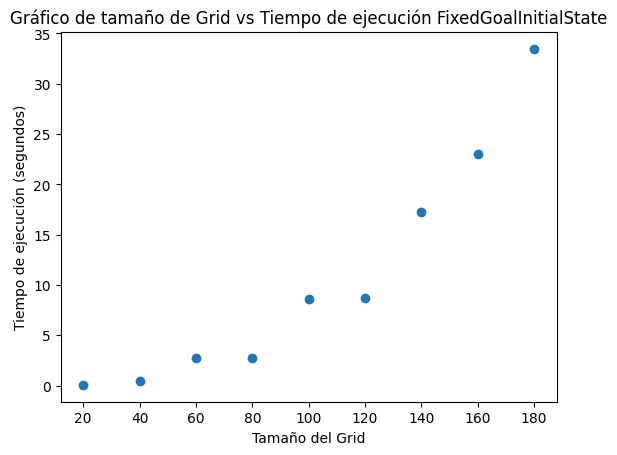

In [134]:
import matplotlib.pyplot as plt

# Experimento 1

x = list_tam
y = t_exp1

plt.scatter(x,y)
plt.xlabel('Tamaño del Grid')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.title('Gráfico de tamaño de Grid vs Tiempo de ejecución FixedGoalInitialState')
plt.show()

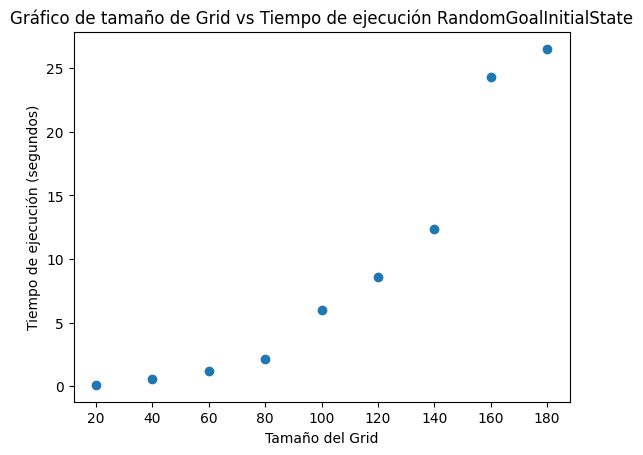

In [135]:
import matplotlib.pyplot as plt

# Experimento 2

x = list_tam
y = t_exp2

plt.scatter(x,y)
plt.xlabel('Tamaño del Grid')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.title('Gráfico de tamaño de Grid vs Tiempo de ejecución RandomGoalInitialState')
plt.show()

### Gráficas de Delta vs Número de iteración

Tiene la finalidad de evaluar la influencia de que el Grid tenga un Estado inicial estático o aleatorizado.


$\Delta = |V_{Actual}^{Política}-V_{Anterior}^{Política}|$


In [136]:
list_deltas_experimento=[]
list_iteraciones = []
for key,value in dict_experimentos.items():
  delta=dict_experimentos[key][2]
  iteracion = dict_experimentos[key][3]
  list_deltas_experimento.append(delta)
  list_iteraciones.append(iteracion)

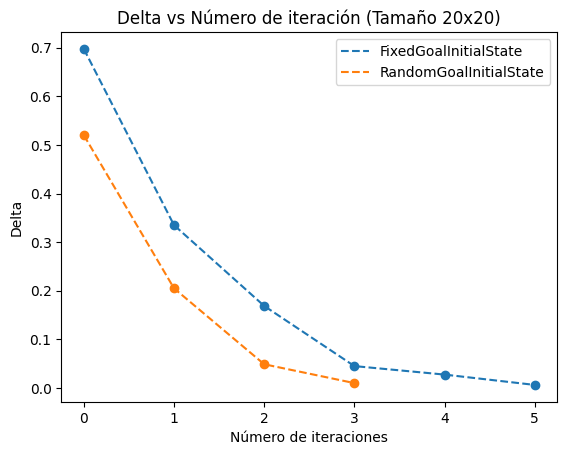

In [137]:

import matplotlib.pyplot as plt

deltas_exp1=list_deltas_experimento[:9] #FixedGoalInitialState
deltas_exp2=list_deltas_experimento[9:] #RandomGoalInitialState

x = deltas_exp1[1]
y = deltas_exp2[1]

plt.scatter(range(len(x)), x)
plt.plot(range(len(x)), x, '--', label='FixedGoalInitialState')
plt.scatter(range(len(y)), y)
plt.plot(range(len(y)), y, '--', label='RandomGoalInitialState')

plt.xlabel('Número de iteraciones')
plt.ylabel('Delta')
plt.title('Delta vs Número de iteración (Tamaño 20x20)')
plt.legend()
plt.show()


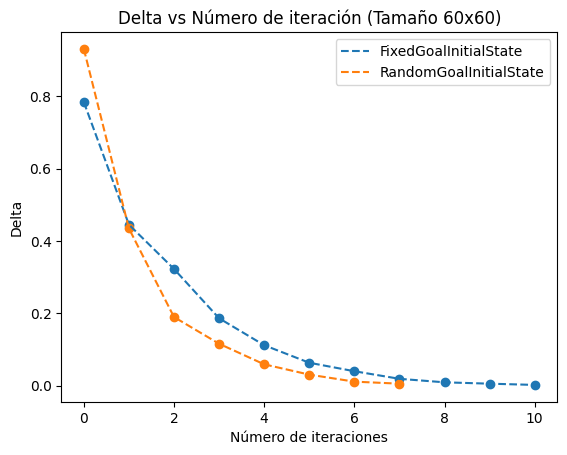

In [138]:

x = deltas_exp1[3]
y = deltas_exp2[3]

plt.scatter(range(len(x)), x)
plt.plot(range(len(x)), x, '--', label='FixedGoalInitialState')
plt.scatter(range(len(y)), y)
plt.plot(range(len(y)), y, '--', label='RandomGoalInitialState')

plt.xlabel('Número de iteraciones')
plt.ylabel('Delta')
plt.title('Delta vs Número de iteración (Tamaño 60x60)')
plt.legend()
plt.show()


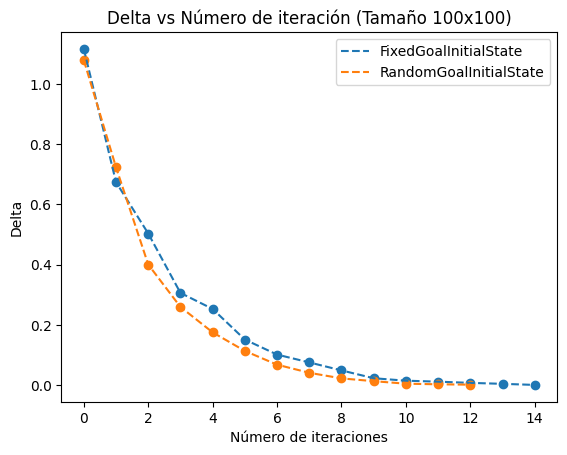

In [139]:
x = deltas_exp1[5]
y = deltas_exp2[5]

plt.scatter(range(len(x)), x)
plt.plot(range(len(x)), x, '--', label='FixedGoalInitialState')
plt.scatter(range(len(y)), y)
plt.plot(range(len(y)), y, '--', label='RandomGoalInitialState')

plt.xlabel('Número de iteraciones')
plt.ylabel('Delta')
plt.title('Delta vs Número de iteración (Tamaño 100x100)')
plt.legend()
plt.show()


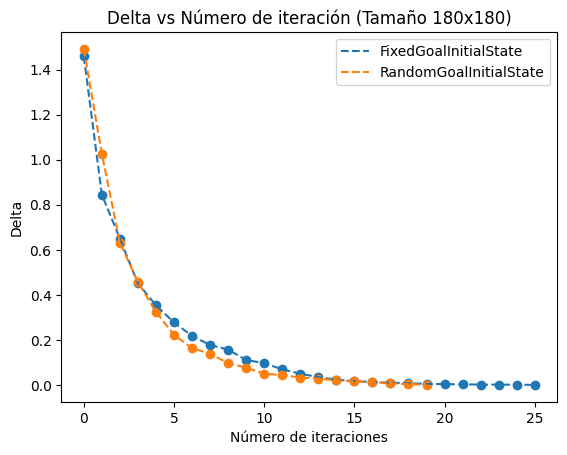

In [140]:
x = deltas_exp1[8]
y = deltas_exp2[8]

plt.scatter(range(len(x)), x)
plt.plot(range(len(x)), x, '--', label='FixedGoalInitialState')
plt.scatter(range(len(y)), y)
plt.plot(range(len(y)), y, '--', label='RandomGoalInitialState')

plt.xlabel('Número de iteraciones')
plt.ylabel('Delta')
plt.title('Delta vs Número de iteración (Tamaño 180x180)')
plt.legend()
plt.show()
